1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [45]:
import numpy as np
import pandas as pd
import scipy
import math
import matplotlib.pyplot as plt

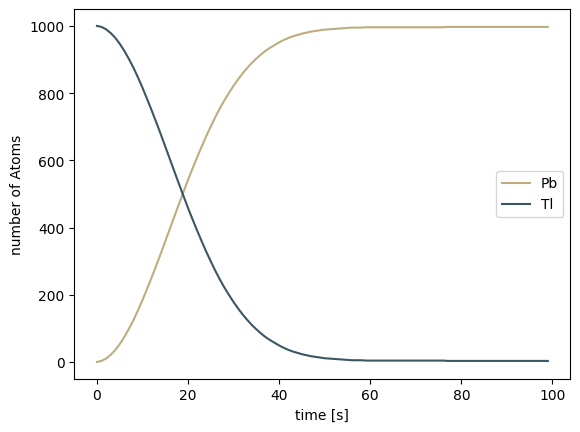

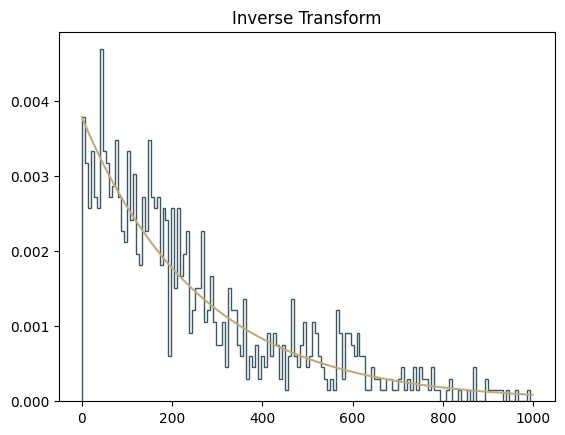

In [46]:
tl = [1000]
pb = [0]

def p(t, tau = 3.052*60):
    return 1 - 2**(-t/tau)

def p2(t, tau = 3.052*60):
    return (2**(-1*t/tau))*np.log(2)/tau

def icdf2(y, tau = 3.052*60):
    return  -tau * np.log2(1 - y)

end = 100
for i in range(1, end):
    per = p(i)
    x = int(tl[-1]*per)
    pb.append(pb[-1] + x)
    tl.append(tl[-1] - x)
x = np.arange(0,end)
plt.plot(x, pb, label = 'Pb', color= '#BDAD7E')
plt.plot(x, tl, label = 'Tl', color= '#3C5664')
plt.xlabel('time [s]')
plt.ylabel('number of Atoms')
plt.legend()
plt.show()

end = end * 10
x = np.arange(0, end)
u = np.random.uniform(p(0), p(end), 1000)
v = icdf2(u)
plt.hist(v, histtype='step', bins=150, density=True, color= '#3C5664')
plt.plot(x, p2(x), color= '#BDAD7E')
plt.title('Inverse Transform')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

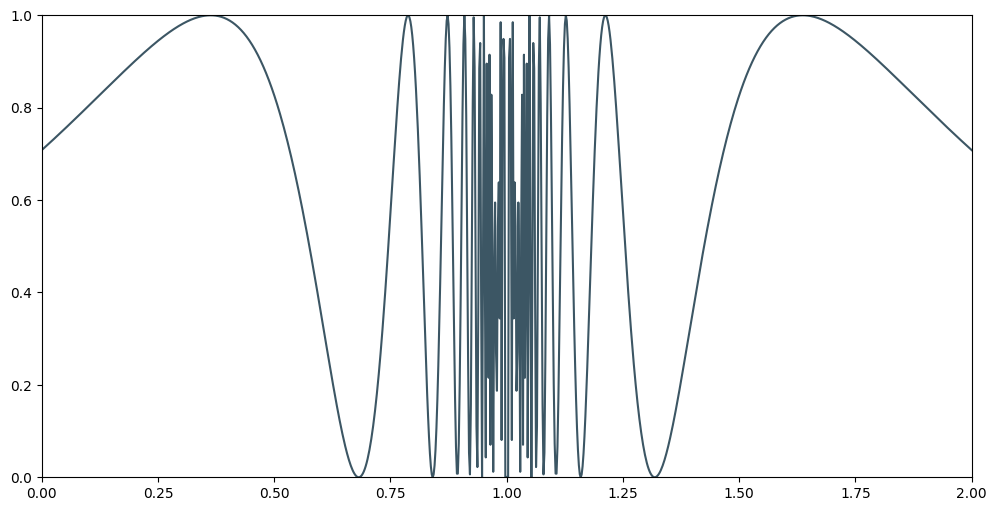

Hit or miss Mean: 1.3478895999999998
Hit or miss Std: 0.002814818615825914
Mean value:  1.3442548565423709
Standard deviation:  0.03162277660168379
Error of estimate= 0.0048051434576290575


In [51]:
n= 100000
l=[]

def f(x):
    return np.sin(1/(1-x))**2

x = np.linspace(0,2,1000)
plt.figure(figsize=(12,6))
plt.plot(x, f(x), color="#3C5664")
plt.axis([0, 2, 0, 1])
plt.show()

for i in range(50):
    c = 0
    for i in range(n):
        x = 2 * np.random.random() 
        y = np.random.random()  
        if y < f(x): c= c + 1
    I = 2 * c / n
    l.append(I)

print("Hit or miss Mean:", np.mean(l))
print("Hit or miss Std:", np.std(l))
x = np.linspace(0, 2, 1000)
mean = (2/1000) * np.sum(f(x))
print("Mean value: ", mean)
print("Standard deviation: ", 1/np.sqrt(1000))
print('Error of estimate=', abs(I-mean))

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [48]:
def volume2D(N):
    count = 0
    for i in range(N):
        x = (2*np.random.uniform(size=2))-1
        norm = np.linalg.norm(x)
        if (norm <= 1):
            count +=1
    I = 4 * count / N
    return I

def volumeND(dim, N):
    V = 2**dim
    count = 0
    for i in range(N):
        x = (2*np.random.uniform(size=dim))-1
        norm = np.linalg.norm(x)
        if (norm <= 1):
            count +=1
    I = V * count / N
    return I

N=100000
V2 = volume2D(N)
print("2D Integral: ", V2)  

V10 = volumeND(10,N)
print("10D Integral: ", V10)

2D Integral:  3.13824
10D Integral:  2.59072


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [50]:
def f(x):
    return ((x**(-1/2))/(np.exp(x)+1))

def w(x):
    return (1/np.sqrt(x))

N = 10000
y = np.random.random(N)
w_int = np.sum(w(y)) / N
x = np.random.uniform(0, 1, N)**2
h = (1.0 / N) * np.sum(f(x) / w(x)) * w_int
print("Integral:", h)

Integral: 0.846948141136999
